In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### The first step to any kind of exploration and modelling requires us to load the data file into the environment.
### The .read_csv() function helps us.

In [2]:
full_data = pd.read_csv('/kaggle/input/faults.csv')

### Let's Check the dimensions of this data

In [3]:
print(full_data.shape)
print("Number of rows: "+str(full_data.shape[0]))
print("Number of columns: "+str(full_data.shape[1]))

(1941, 28)
Number of rows: 1941
Number of columns: 28


### Let's take a look at the top 5 rows of the data to understand what this file contains.
### The .head() function helps us.

## Exploratory Data Analysis - EDA

In [4]:
full_data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50.0,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651.0,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835.0,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860.0,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306.0,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


### To understand the data better that we are going to deal with we would like to have a look at the basic numerical stats of the data like the mean, maximum etc. columnwise.
### The .describe() function helps us.

DataFrame.describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:

* count tells us the number of NoN-empty rows in a feature.
* mean tells us the mean value of that feature.
* std tells us the Standard Deviation Value of that feature.
* min tells us the minimum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
* max tells us the maximum value of that feature.

### We can check the name of all columns in the dataset using the .columns property

In [5]:
full_data.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'target'],
      dtype='object')

In [6]:
full_data.describe().T

,count,mean,std,min,25%,50%,75%,max
X_Minimum,1941.0,5.711360e+02,5.206907e+02,0.0000,51.00000,4.350000e+02,1.053000e+03,1.705000e+03
X_Maximum,1917.0,6.135649e+02,4.961088e+02,4.0000,192.00000,4.580000e+02,1.066000e+03,1.713000e+03
Y_Minimum,1941.0,1.650685e+06,1.774578e+06,6712.0000,471253.00000,1.204128e+06,2.183073e+06,1.298766e+07
Y_Maximum,1941.0,1.650739e+06,1.774590e+06,6724.0000,471281.00000,1.204136e+06,2.183084e+06,1.298769e+07
Pixels_Areas,1941.0,1.893878e+03,5.168460e+03,2.0000,84.00000,1.740000e+02,8.220000e+02,1.526550e+05
X_Perimeter,1941.0,1.118552e+02,3.012092e+02,2.0000,15.00000,2.600000e+01,8.400000e+01,1.044900e+04
Y_Perimeter,1941.0,8.296600e+01,4.264829e+02,1.0000,13.00000,2.500000e+01,8.300000e+01,1.815200e+04
Sum_of_Luminosity,1941.0,2.063121e+05,5.122936e+05,250.0000,9522.00000,1.920200e+04,8.301100e+04,1.159141e+07
Minimum_of_Luminosity,1941.0,8.454869e+01,3.213428e+01,0.0000,63.00000,9.000000e+01,1.060000e+02,2.030000e+02
Maximum_of_Luminosity,1941.0,1.301937e+02,1.869099e+01,37.0000,124.00000,1.270000e+02,1.400000e+02,2.530000e+02


### Lets try to understand what this data is all about.  

### One of the first steps is to gather all possible information about the data and understand the problem statement that we are going to target with the data.

## Data Visualisation

### Since this is a classification problem it would be important and interesting to the distribution of target variables for the data.

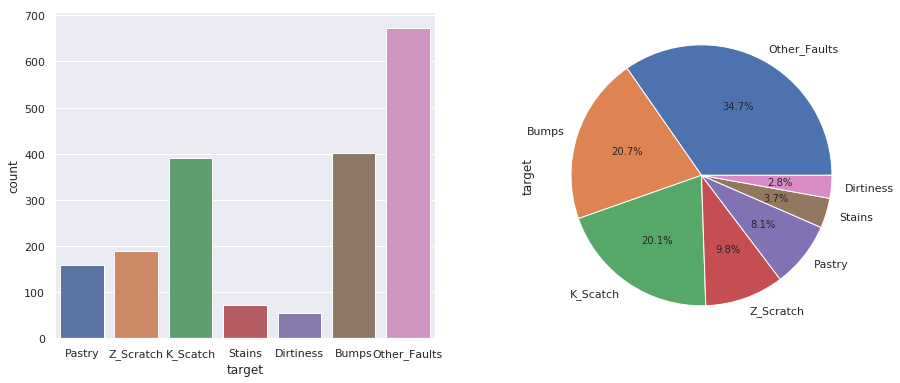

In [7]:
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='target', data=full_data, ax=ax[0])
_ = full_data['target'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

#### So there are 7 classes of faults in the steel. We can see that the distribution of the classes is greatly disbalanced. 'Other_Faults' class is in majority while 'Dirtiness' class is the minority here.

### Let's check the distribution of data using Histogram and Density visualisation method.

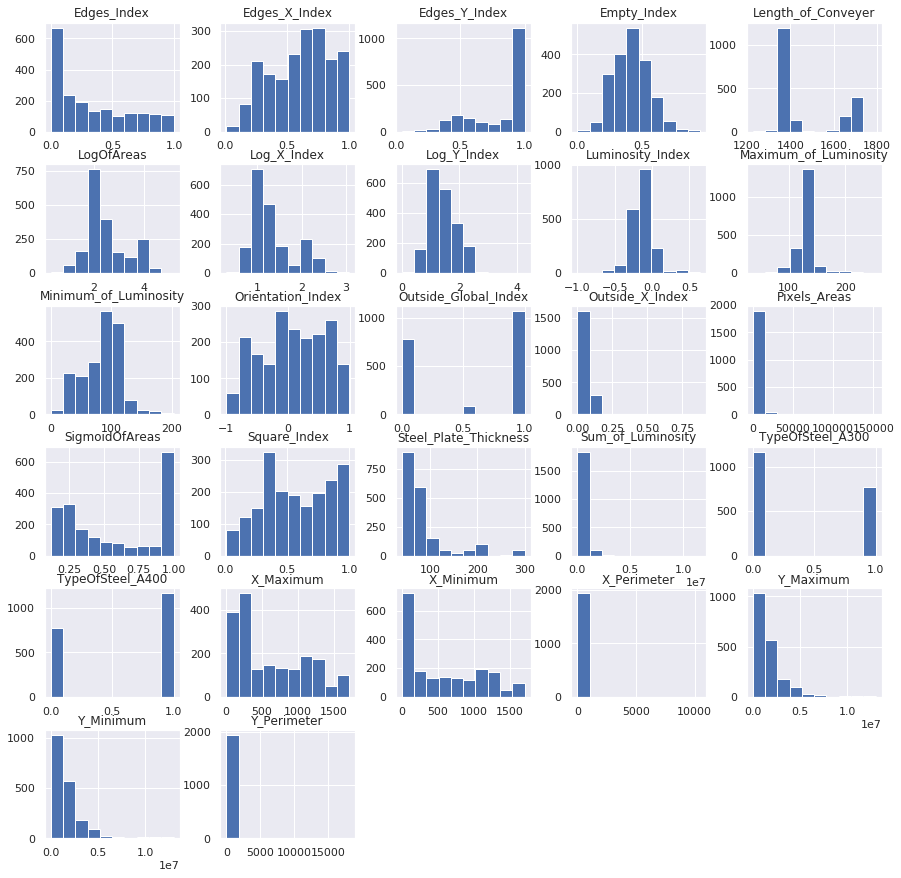

In [8]:
full_data.hist(figsize=(15,15))
plt.show()

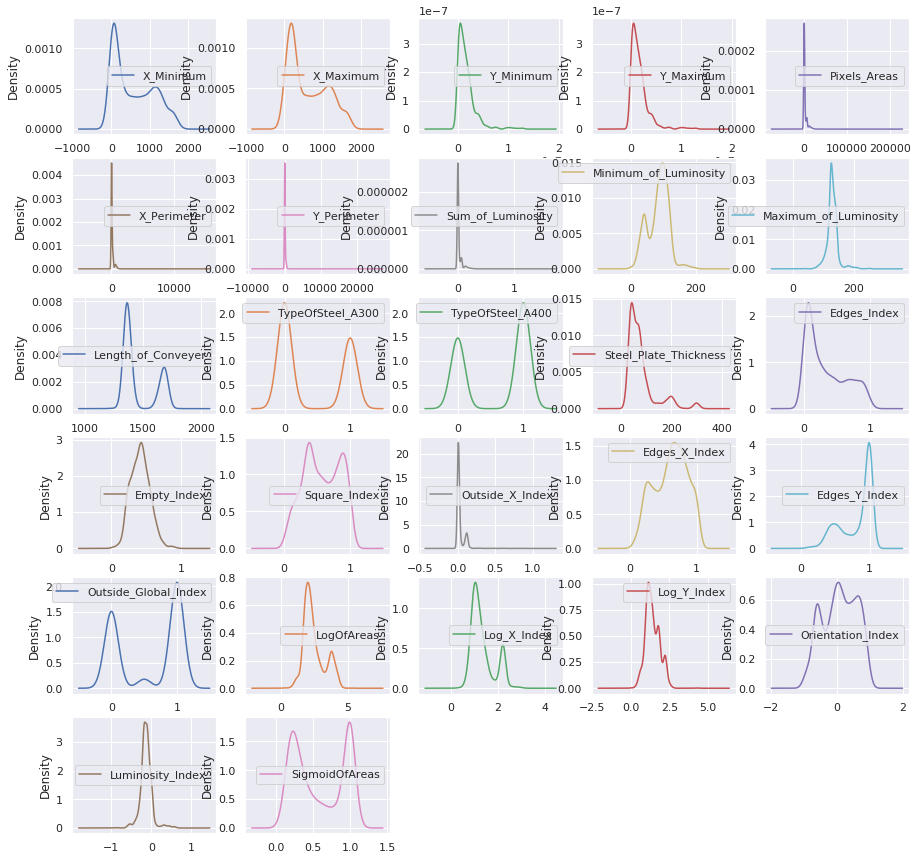

In [9]:
full_data.plot(kind="density", layout=(6,5), 
             subplots=True,sharex=False, sharey=False, figsize=(15,15))
plt.show()

### Among the various questions that arise, one crucial question is to ask whether the data contains any missing values? Lets see how we can find the answer to that.


In [10]:
full_data.isnull().sum()

X_Minimum                 0
X_Maximum                24
Y_Minimum                 0
Y_Maximum                 0
Pixels_Areas              0
X_Perimeter               0
Y_Perimeter               0
Sum_of_Luminosity         0
Minimum_of_Luminosity     0
Maximum_of_Luminosity     0
Length_of_Conveyer        0
TypeOfSteel_A300          0
TypeOfSteel_A400          0
Steel_Plate_Thickness    30
Edges_Index               0
Empty_Index              26
Square_Index              0
Outside_X_Index           0
Edges_X_Index             0
Edges_Y_Index             0
Outside_Global_Index      0
LogOfAreas                0
Log_X_Index               0
Log_Y_Index               0
Orientation_Index         0
Luminosity_Index          0
SigmoidOfAreas            0
target                    0
dtype: int64

### By looking at the numbers we can understand that the result is pointing to the number of missing values in each column of the data.

### Its important to check for missing values and get rid of them because most of the machine learning algorithms have not been designed to handle missing values and whenever row having missing values would go for training or prediction in the algorithm it would raise an error.

### Once we know that the data contains missing values, it is important that we fill the missing places. Now we will be looking at some of the majorly used techniques for missing value filling, usually referred to as missing value 'imputation'.

#### There are two main ways to fill any missing values:

1. By Mean
2. By Median

And the decision of filling by mean or median is based on the distribution of the data columns individually. Here's when the histogram and density plots come into play. If the distribution of the column is skewed, we choose median to fill the missing values and if the distribution is normal we go for the mean.

Let's look at the term skew in some more detail.

## Skewness

A ***left-skewed distribution*** has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A ***right-skewed distribution*** has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.


![](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2014/02/pearson-mode-skewness.jpg)


#### to learn more about skewness
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/

* X_Maximum   - skew
* Steel_Plate_Thickness - skew
* Empty_Index - No Skew

## Data Preprocessing

In [11]:
full_data.X_Maximum.fillna(full_data.X_Maximum.median(),inplace=True)
full_data.Steel_Plate_Thickness.fillna(full_data.Steel_Plate_Thickness.median(),inplace=True)
full_data.Empty_Index.fillna(np.mean(full_data.Empty_Index),inplace=True)

In [12]:
full_data.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
target                   0
dtype: int64

In [13]:
def draw_univariate_plot(dataset, rows, cols, plot_type):
    column_names=dataset.columns.values
    number_of_column=len(column_names)
    fig, axarr=plt.subplots(rows,cols, figsize=(30,35))

    counter=0
    
    for i in range(rows):
        for j in range(cols):

            if column_names[counter]=='target':
                break
            if 'violin' in plot_type:
                sns.violinplot(x='target', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                #sns.boxplot(x='target', y=column_names[counter],data=dataset, ax=axarr[i][j])
                sns.boxplot(x=None, y=column_names[counter],data=dataset, ax=axarr[i][j])

            counter += 1
            if counter==(number_of_column-1,):
                break

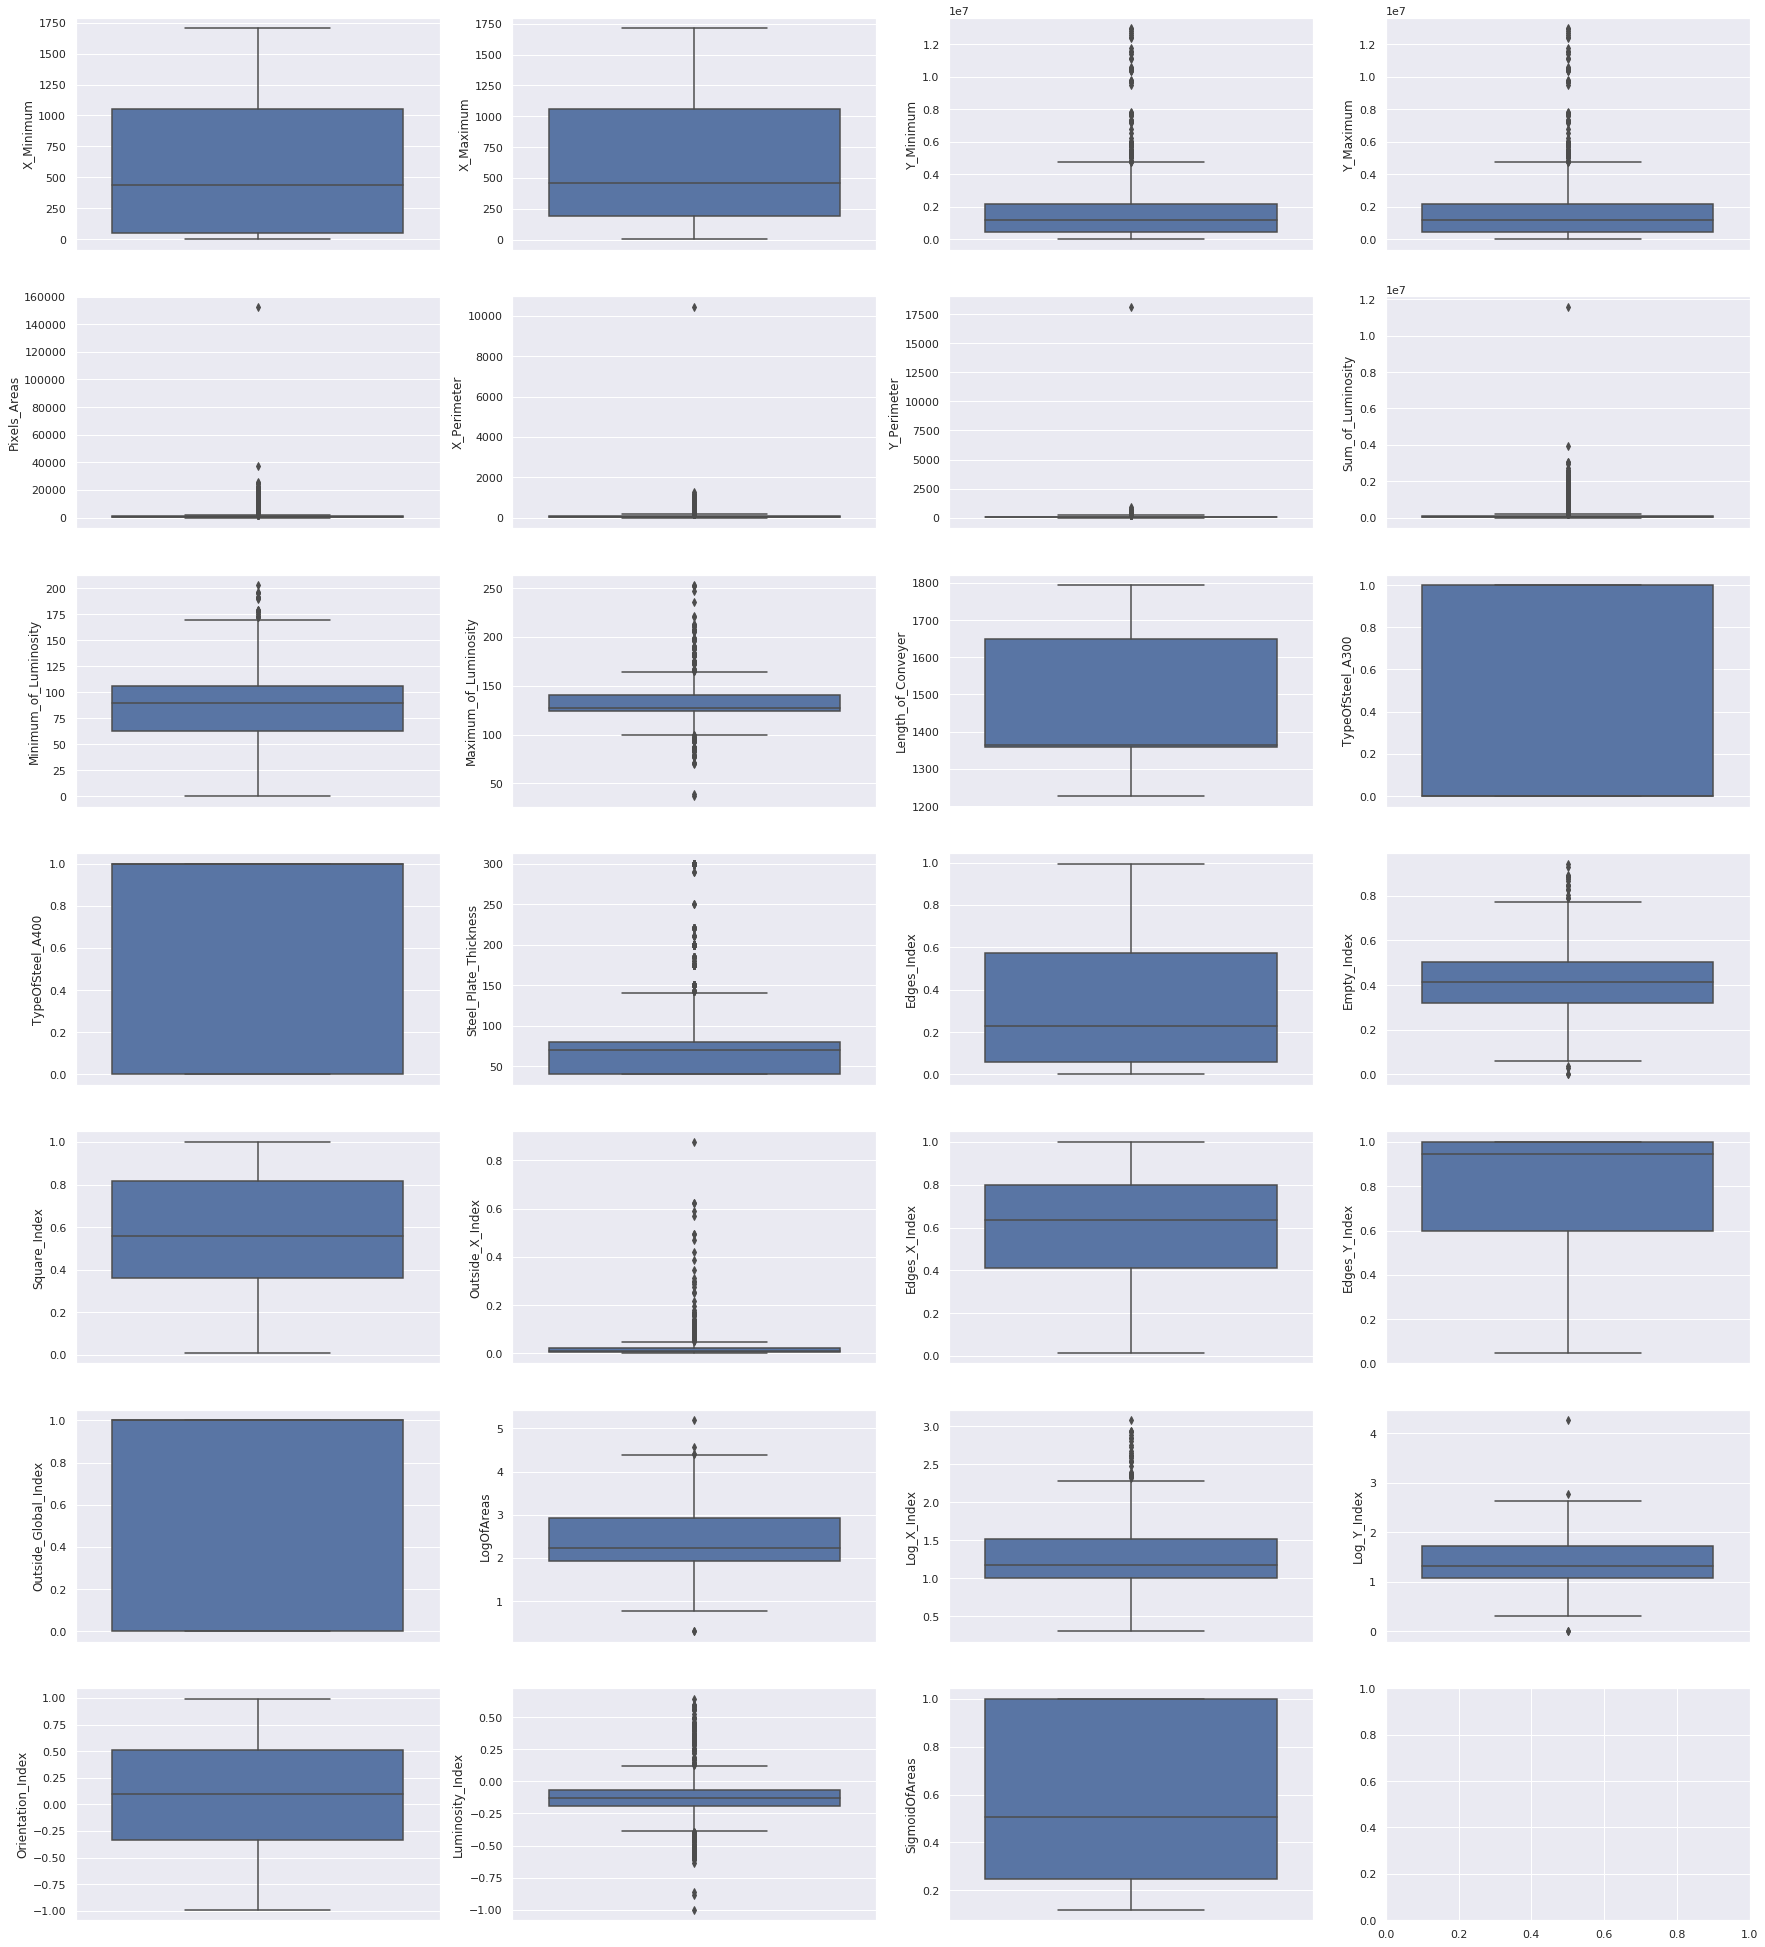

In [14]:
draw_univariate_plot(dataset=full_data, rows=7, cols=4,plot_type="box")

### As we can see the target variable has text values as the name of classes. When a machine learning algorithm takes input it expects all values to be numerical and can not handle text values directly. It will simply throw an error if text value is fed to the model. Hence we need to replace text value with a number that can represent the class. Label Encoder tool helps us perform the same.

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=full_data.drop('target',axis=1)
Y=le.fit_transform(full_data['target'])

In [16]:
le.classes_

array(['Bumps', 'Dirtiness', 'K_Scatch', 'Other_Faults', 'Pastry',
       'Stains', 'Z_Scratch'], dtype=object)

In [17]:
le.inverse_transform([0,1,2,3,4,5,6])

array(['Bumps', 'Dirtiness', 'K_Scatch', 'Other_Faults', 'Pastry',
       'Stains', 'Z_Scratch'], dtype=object)

In [18]:
dict(zip(le.inverse_transform([0,1,2,3,4,5,6]),[0,1,2,3,4,5,6]))

{'Bumps': 0,
 'Dirtiness': 1,
 'K_Scatch': 2,
 'Other_Faults': 3,
 'Pastry': 4,
 'Stains': 5,
 'Z_Scratch': 6}

## Test Train Split and Cross Validation methods



***Train Test Split*** : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

![](https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png)


***About Stratify*** : Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For Reference : https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y, stratify=Y, test_size = 0.3,random_state = 42)

In [20]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_predict_train_logreg = logreg.predict(X_train)
y_predict_test_logreg = logreg.predict(X_test)

train_accuracy_score_logreg = accuracy_score(y_train, y_predict_train_logreg)
test_accuracy_score_logreg = accuracy_score(y_test, y_predict_test_logreg)

print(train_accuracy_score_logreg)
print(test_accuracy_score_logreg)

0.5353460972017673
0.5128644939965694


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


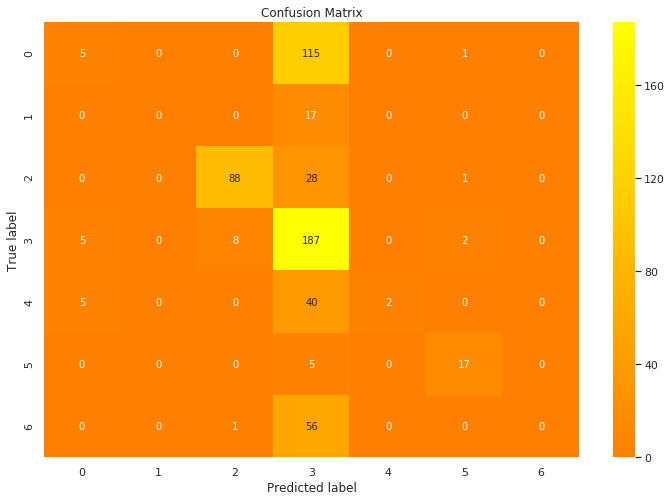

In [22]:
cm_logreg = confusion_matrix(y_test,y_predict_test_logreg)
draw_confusion_matrix(cm_logreg)

### Introduction to Confusion Matrix

The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.
![](https://cdn-images-1.medium.com/max/1600/0*-GAP6jhtJvt7Bqiv.png)



### ***In the famous cancer example***:


###### Cases in which the doctor predicted YES (they have the disease), and they do have the disease will be termed as TRUE POSITIVES (TP). The doctor has correctly predicted that the patient has the disease.

###### Cases in which the doctor predicted NO (they do not have the disease), and they don’t have the disease will be termed as TRUE NEGATIVES (TN). The doctor has correctly predicted that the patient does not have the disease.

###### Cases in which the doctor predicted YES, and they do not have the disease will be termed as FALSE POSITIVES (FP). Also known as “Type I error”.

###### Cases in which the doctor predicted NO, and they have the disease will be termed as FALSE NEGATIVES (FN). Also known as “Type II error”.

![](https://cdn-images-1.medium.com/max/1600/0*9r99oJ2PTRi4gYF_.jpg)

#### Since the score of accuracy is so low for training and testing it means that the data is not following any linear trend. We should try non linear machine learning algorithms.

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=6, criterion = 'entropy', 
                            min_samples_leaf= 1,min_samples_split= 2)
rf.fit(X_train, y_train)

y_predict_train_rf = rf.predict(X_train)
y_predict_test_rf = rf.predict(X_test)

train_accuracy_score_rf = accuracy_score(y_train, y_predict_train_rf)
test_accuracy_score_rf = accuracy_score(y_test, y_predict_test_rf)

print(train_accuracy_score_rf)
print(test_accuracy_score_rf)

0.7827687776141384
0.7135506003430532


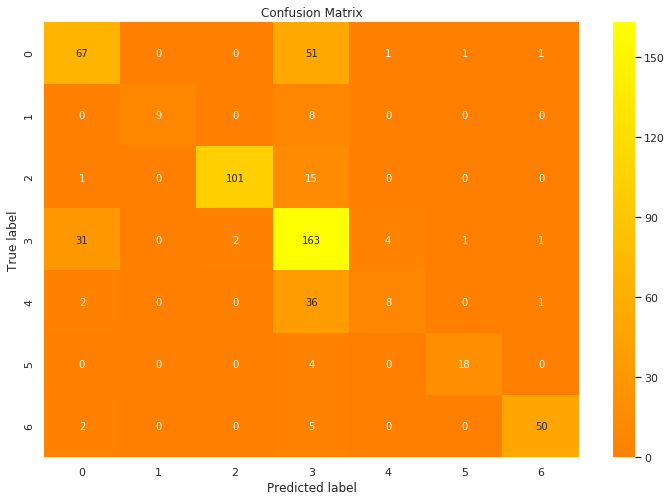

In [24]:
cm_rf = confusion_matrix(y_test,y_predict_test_rf)
draw_confusion_matrix(cm_rf)